In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [223]:
dataset = pd.read_csv('salary.csv', sep='|')
trainData = pd.read_csv('train.csv', sep='|')
testData = pd.read_csv('test.csv', sep='|')

In [224]:
dataset = dataset.drop(labels=["salary_currency", "job_benefits", "job_function", "company_industry", "job_description",
"company_process_time", "company_size"], axis=1)
dataset.dropna(inplace=True)

In [225]:
dataset.isnull().sum()

id                  0
job_title           0
location            0
career_level        0
experience_level    0
education_level     0
employment_type     0
salary              0
dtype: int64

In [226]:
dataset["years_experience"] = dataset["experience_level"]
dataset["years_experience"] = dataset["years_experience"].str.replace("\D", "").fillna(0).astype('int')
dataset["salary"] = dataset["salary"].astype('int')
dataset.reset_index(drop=True, inplace=True)
dataset.head(5)

,id,job_title,location,career_level,experience_level,education_level,employment_type,salary,years_experience
0,10,Tax Supervisor,Banten,Supervisor/Koordinator,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,8000000,3
1,19,Accounting Staff,Jakarta Pusat,Pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,4750000,1
2,23,Senior Staff Purchasing,Surabaya,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,5250000,2
3,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,Manajer/Asisten Manajer,2 tahun,Tidak terspesifikasi,Penuh Waktu,15000000,2
4,29,Mechanic,Papua,Pegawai (non-manajemen & non-supervisor),1 tahun,Tidak terspesifikasi,Penuh Waktu,5040000,1


In [227]:
dataset.groupby(by="years_experience")["salary"].mean().astype("int")

years_experience
1      5756594
2      6127222
3      8628338
4     10299937
5     12183791
6     15600000
7     14263461
8     19795109
10    28079616
11    14500000
12    20187500
15    34363636
17     2160000
20    36583333
Name: salary, dtype: int32

In [228]:
xYear = dataset.loc[:, ["years_experience"]].values
ySal = dataset.loc[:, ["salary"]].values

In [229]:
xTrain, xTest, yTrain, yTest = train_test_split(xYear, ySal)

In [230]:
model = LinearRegression()
model.fit(xTrain, yTrain)
model.predict(xTest)

array([[ 5059222.99187532],
       [ 7018932.57649432],
       [12898061.33035131],
       ...,
       [ 7018932.57649432],
       [ 5059222.99187532],
       [ 7018932.57649432]])

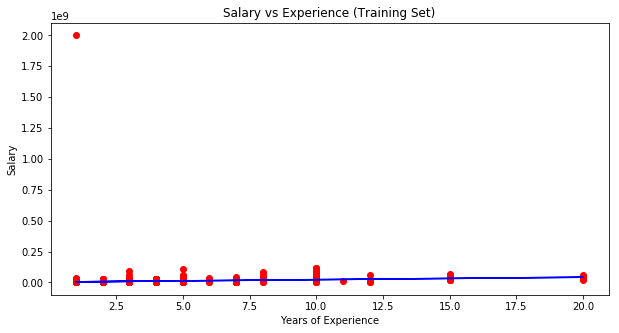

In [231]:
plt.figure(figsize=(10, 5))
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, model.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

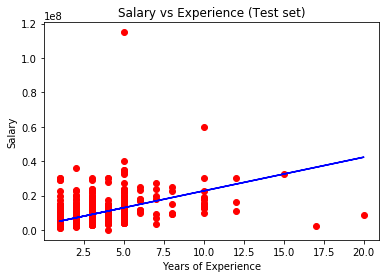

In [232]:
plt.scatter(xTest, yTest, color = 'red')
plt.plot(xTrain, model.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [233]:
model.predict([[10]])

array([[22696609.2534463]])

In [234]:
model.score(xTest, yTest)

0.1912843924476302